<a href="https://colab.research.google.com/github/Richofedhias/Tubes-Mesin/blob/main/tubes_mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df_train=pd.read_csv('gdrive/My Drive/Tubes mesin/kendaraan_train.csv')
df_test=pd.read_csv('gdrive/My Drive/Tubes mesin/kendaraan_test.csv')

In [3]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


Cek Missing Value

In [7]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [8]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [9]:
df_train.corr(method='spearman')

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001517,-0.002658,0.001951,-0.003043,0.002457,-0.000992,0.000909,0.000972
Umur,0.001517,1.000000,-0.064608,0.013787,-0.268518,0.096842,-0.648150,-0.000675,0.143159
SIM,-0.002658,-0.064608,1.000000,-0.001548,0.016073,-0.013088,0.045165,-0.001268,0.009588
Kode_Daerah,0.001951,0.013787,-0.001548,1.000000,-0.003801,-0.037825,-0.015110,-0.003703,0.000540
Sudah_Asuransi,-0.003043,-0.268518,0.016073,-0.003801,1.000000,-0.028814,0.210884,0.002756,-0.340917
Premi,0.002457,0.096842,-0.013088,-0.037825,-0.028814,1.000000,-0.195677,0.000452,0.035268
Kanal_Penjualan,-0.000992,-0.648150,0.045165,-0.015110,0.210884,-0.195677,1.000000,-0.000083,-0.139477
Lama_Berlangganan,0.000909,-0.000675,-0.001268,-0.003703,0.002756,0.000452,-0.000083,1.000000,-0.002224
Tertarik,0.000972,0.143159,0.009588,0.000540,-0.340917,0.035268,-0.139477,-0.002224,1.000000


Permodelan


In [10]:
df_train = df_train.drop(['id'], axis = 1)

In [11]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [12]:
df_train['Jenis_Kelamin'].describe()

count     271391
unique         2
top         Pria
freq      146678
Name: Jenis_Kelamin, dtype: object

In [13]:
df_train = df_train[df_train['Jenis_Kelamin'].notna()]

In [14]:
df_train.isnull().sum()


Jenis_Kelamin            0
Umur                 13459
SIM                  13721
Kode_Daerah          13553
Sudah_Asuransi       13541
Umur_Kendaraan       13560
Kendaraan_Rusak      13485
Premi                13822
Kanal_Penjualan      13595
Lama_Berlangganan    13275
Tertarik                 0
dtype: int64

In [15]:
df_train["Jenis_Kelamin"].unique()

array(['Wanita', 'Pria'], dtype=object)

In [16]:
df_train.loc[df_train['Jenis_Kelamin'] == 0]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


In [17]:
df_train.loc[df_train['Jenis_Kelamin'] != 0]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df_train["Jenis_Kelamin"] = label_enc.fit_transform(df_train["Jenis_Kelamin"])

In [19]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,0,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,0,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0


Pemodelan Umur

In [20]:
df_train['Umur'].describe()

count    257932.000000
mean         38.831568
std          15.528433
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Umur, dtype: float64

In [21]:
df_train = df_train[df_train['Umur'].notna()]

In [22]:
df_train["Umur"].fillna(method="ffill")

0         30.0
1         48.0
3         58.0
4         50.0
5         21.0
          ... 
285826    23.0
285827    21.0
285828    23.0
285829    68.0
285830    45.0
Name: Umur, Length: 257932, dtype: float64

In [23]:
import numpy as np
df_train['Umur'] = df_train["Umur"].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_train["Umur"].fillna(method="ffill")

0         30
1         48
3         58
4         50
5         21
          ..
285826    23
285827    21
285828    23
285829    68
285830    45
Name: Umur, Length: 257932, dtype: int64

In [25]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,0,48,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,1,58,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,0,50,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,0,21,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0


In [26]:
df_train.isnull().sum()

Jenis_Kelamin            0
Umur                     0
SIM                  13076
Kode_Daerah          12872
Sudah_Asuransi       12846
Umur_Kendaraan       12902
Kendaraan_Rusak      12842
Premi                13179
Kanal_Penjualan      12945
Lama_Berlangganan    12600
Tertarik                 0
dtype: int64

Pemodelan Sim

In [27]:
combine = [df_train, df_test]

In [28]:
for dataset in combine :
     dataset['SIM'] = dataset['SIM'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_train.isnull().sum()

Jenis_Kelamin            0
Umur                     0
SIM                      0
Kode_Daerah          12872
Sudah_Asuransi       12846
Umur_Kendaraan       12902
Kendaraan_Rusak      12842
Premi                13179
Kanal_Penjualan      12945
Lama_Berlangganan    12600
Tertarik                 0
dtype: int64

Drop Kode Daerah

In [30]:
df_train = df_train.drop(['Kode_Daerah'], axis = 1)

In [31]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,0,48,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,1,58,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,0,50,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,0,21,1.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0


Pemodelan Sudah_asuransi


In [32]:
df_train.isnull().sum()

Jenis_Kelamin            0
Umur                     0
SIM                      0
Sudah_Asuransi       12846
Umur_Kendaraan       12902
Kendaraan_Rusak      12842
Premi                13179
Kanal_Penjualan      12945
Lama_Berlangganan    12600
Tertarik                 0
dtype: int64

In [33]:
df_train['Sudah_Asuransi'].describe()

count    245086.000000
mean          0.459133
std           0.498328
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sudah_Asuransi, dtype: float64

In [34]:
df_train = df_train[df_train['Sudah_Asuransi'].notna()]

In [35]:
df_train["Sudah_Asuransi"].unique()

array([1., 0.])

In [36]:
df_train['Sudah_Asuransi'] = df_train["Sudah_Asuransi"].astype(np.int64)

In [37]:
df_train["Sudah_Asuransi"].fillna(method="ffill")

0         1
1         0
3         0
4         0
5         1
         ..
285826    1
285827    1
285828    1
285829    1
285830    0
Name: Sudah_Asuransi, Length: 245086, dtype: int64

In [38]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,0,48,1.0,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,1,58,1.0,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,0,50,1.0,0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,0,21,1.0,1,< 1 Tahun,Tidak,22735.0,152.0,171.0,0


Pemodelan Umur Kendaraan

In [39]:
df_train.isnull().sum()

Jenis_Kelamin            0
Umur                     0
SIM                      0
Sudah_Asuransi           0
Umur_Kendaraan       12254
Kendaraan_Rusak      12223
Premi                12522
Kanal_Penjualan      12307
Lama_Berlangganan    11989
Tertarik                 0
dtype: int64

In [40]:
df_train['Umur_Kendaraan'].describe()

count        232832
unique            3
top       1-2 Tahun
freq         122319
Name: Umur_Kendaraan, dtype: object

In [41]:
df_train["Umur_Kendaraan"].unique()

array(['< 1 Tahun', '> 2 Tahun', '1-2 Tahun', nan], dtype=object)

In [42]:
df_train = df_train[df_train['Umur_Kendaraan'].notna()]

In [43]:
arr_umur_kendaraan = np.array(df_train["Umur_Kendaraan"])

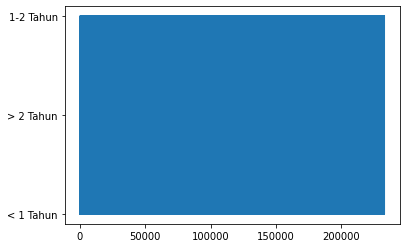

In [44]:
import matplotlib.pyplot as pp
pp.plot(arr_umur_kendaraan)
pp.show()

In [45]:
# for i in range(len(arr_umur_kendaraan)):
#   if arr_umur_kendaraan[i] == "< 1 Tahun" :
#     arr_umur_kendaraan[i] = 0
#   elif arr_umur_kendaraan[i] == "1-2 Tahun" :
#     arr_umur_kendaraan[i] = 1
#   elif arr_umur_kendaraan[i] == "> 2 Tahun" :
#     arr_umur_kendaraan[i] = 2
#   else:
#     arr_umur_kendaraan[i] = 3

umurkendaraan = {'< 1 Tahun': 1, '1-2 Tahun': 2, '> 2 Tahun':3}
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map(umurkendaraan)

In [46]:
df_train

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1,1,Tidak,28029.0,152.0,97.0,0
1,0,48,1.0,0,3,Pernah,25800.0,29.0,158.0,0
3,1,58,1.0,0,2,Tidak,2630.0,124.0,63.0,0
4,0,50,1.0,0,3,NaN,34857.0,88.0,194.0,0
5,0,21,1.0,1,1,Tidak,22735.0,152.0,171.0,0
...,...,...,...,...,...,...,...,...,...,...
285826,1,23,1.0,1,1,Tidak,25988.0,152.0,217.0,0
285827,1,21,1.0,1,1,Tidak,44686.0,152.0,50.0,0
285828,1,23,1.0,1,1,Tidak,49751.0,152.0,226.0,0
285829,0,68,1.0,1,2,Tidak,30503.0,124.0,270.0,0


In [47]:
df_train["Umur_Kendaraan"].unique()

array([1, 3, 2])

Pemodelan Kendaraan Rusak

In [48]:
df_train['Kendaraan_Rusak'].describe()

count     221196
unique         2
top       Pernah
freq      111610
Name: Kendaraan_Rusak, dtype: object

In [49]:
df_train["Kendaraan_Rusak"].unique()

array(['Tidak', 'Pernah', nan], dtype=object)

In [50]:
df_train = df_train[df_train['Kendaraan_Rusak'].notna()]

In [51]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1,1,Tidak,28029.0,152.0,97.0,0
1,0,48,1.0,0,3,Pernah,25800.0,29.0,158.0,0
3,1,58,1.0,0,2,Tidak,2630.0,124.0,63.0,0
5,0,21,1.0,1,1,Tidak,22735.0,152.0,171.0,0
7,0,23,0.0,1,1,Tidak,26869.0,152.0,222.0,0


In [52]:
label_enc = LabelEncoder()
df_train["Kendaraan_Rusak"] = label_enc.fit_transform(df_train["Kendaraan_Rusak"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1,1,1,28029.0,152.0,97.0,0
1,0,48,1.0,0,3,0,25800.0,29.0,158.0,0
3,1,58,1.0,0,2,1,2630.0,124.0,63.0,0
5,0,21,1.0,1,1,1,22735.0,152.0,171.0,0
7,0,23,0.0,1,1,1,26869.0,152.0,222.0,0


In [54]:
df_train['Kendaraan_Rusak'] = df_train["Kendaraan_Rusak"].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Pemodelan Premi





In [55]:
df_train['Premi'].describe()

count    209944.000000
mean      30527.227623
std       17135.870937
min        2630.000000
25%       24371.000000
50%       31615.000000
75%       39374.000000
max      540165.000000
Name: Premi, dtype: float64

In [56]:
arr_premi = np.array(df_train["Premi"])

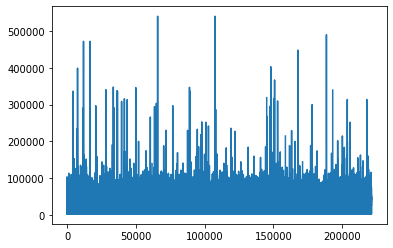

In [57]:
pp.plot(arr_premi)
pp.show()

In [58]:
df_train["Premi"].unique()

array([28029., 25800.,  2630., ..., 77615., 72125., 52138.])

In [59]:
df_train = df_train[df_train['Premi'].notna()]

In [60]:
for i in range(len(arr_premi)):
  if arr_premi[i] < 24371 :
    arr_premi[i] = 0
  elif arr_premi[i] < 31615 :
    arr_premi[i] = 1
  elif arr_premi[i] < 39374 :
    arr_premi[i] = 2
  else:
    arr_premi[i] = 3

In [61]:
arr_premi

array([1., 1., 0., ..., 3., 1., 3.])

In [62]:
for i in range(len(arr_premi)):
  df_train["Premi"][i] = arr_premi[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30,1.0,1,1,1,1.0,152.0,97.0,0
1,0,48,1.0,0,3,0,1.0,29.0,158.0,0
3,1,58,1.0,0,2,1,0.0,124.0,63.0,0
5,0,21,1.0,1,1,1,1.0,152.0,171.0,0
7,0,23,0.0,1,1,1,3.0,152.0,222.0,0


In [64]:
df_train['Premi'] = df_train["Premi"].astype(np.int64)

In [74]:
df_train["Premi"].unique()

array([    1,     0,     3, ..., 25988, 44686, 49751])

Pemodelan Kanal Penjualan

In [65]:
df_train['Kanal_Penjualan'].describe()

count    199350.000000
mean        112.165001
std          54.145956
min           1.000000
25%          29.000000
50%         138.000000
75%         152.000000
max         163.000000
Name: Kanal_Penjualan, dtype: float64

In [69]:
arr_kanal = np.array(df_train["Kanal_Penjualan"])

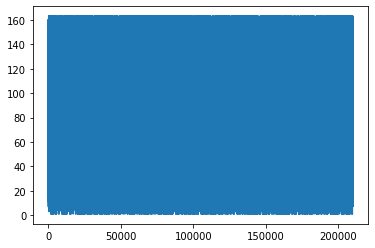

In [73]:
pp.plot(arr_kanal)
pp.show()

In [71]:
df_train["Kanal_Penjualan"].unique()

array([152.,  29., 124., 160., 145.,  31.,  nan,  26., 156., 122.,   7.,
       154.,  25.,  11., 133., 157.,  30.,  52.,  23.,  14.,  16., 163.,
       151.,   4., 155.,  24.,  22., 120.,   8., 125.,  12.,   3.,  94.,
       153., 131.,  60., 150.,  47.,  55.,  10.,  13., 138.,  15., 159.,
        18., 158.,  37.,  19., 148.,   1., 129.,  64., 147.,  56.,  61.,
       136.,   9., 119., 106., 111.,  35., 135.,  65.,  42.,  21., 140.,
       132.,  48.,  59.,  66., 139.,  54., 108.,  36., 116.,  44.,  86.,
        80.,  46.,  40.,  95., 127., 109., 113., 137.,  75.,  97., 123.,
       103., 126., 130.,  91., 100., 128.,  78.,  68.,  63.,  53., 121.,
        57.,  32.,  93., 134.,  49., 114.,  92.,  87., 118.,  98., 117.,
       110., 107.,  88.,  38.,  76.,  73.,  90.,  20.,  51.,  96., 146.,
        83.,  58.,  84.,  50.,  79.,  89.,  45.,  28.,  17., 105., 144.,
         2.,  62.,  81.,  69.,  71.,  33.,  39.,  34.,  67.,  82., 102.,
        99., 101.,  70., 115.,  74.])

In [75]:
df_train = df_train[df_train['Kanal_Penjualan'].notna()]

In [77]:
for i in range(len(arr_kanal)):
  if arr_kanal[i] < 29 :
    arr_kanal[i] = 0
  elif arr_kanal[i] < 138 :
    arr_kanal[i] = 1
  elif arr_kanal[i] < 152 :
    arr_kanal[i] = 2
  else:
    arr_kanal[i] = 3

In [78]:
arr_kanal

array([3., 1., 1., ..., 3., 1., 0.])

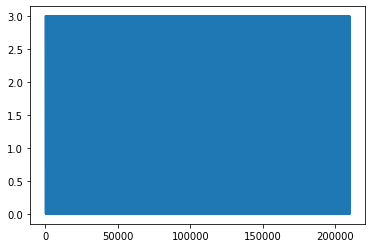

In [79]:
pp.plot(arr_kanal)
pp.show()

In [80]:
for i in range(len(arr_kanal)):
  df_train["Kanal_Penjualan"][i] = arr_kanal[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_train['Kanal_Penjualan'] = df_train["Kanal_Penjualan"].astype(np.int64)

In [83]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30,1.0,1,1,1,1,3,97.0
1,0,48,1.0,0,3,0,1,1,158.0
3,1,58,1.0,0,2,1,0,3,63.0
5,0,21,1.0,1,1,1,1,3,171.0
7,0,23,0.0,1,1,1,3,3,222.0


Pemodelan Lama Berlangganan

In [86]:
df_train['Lama_Berlangganan'].describe()

count    189697.000000
mean        154.179634
std          83.827072
min          10.000000
25%          81.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Lama_Berlangganan, dtype: float64

In [87]:
arr_lama = np.array(df_train["Lama_Berlangganan"])

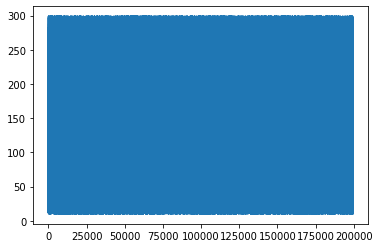

In [88]:
pp.plot(arr_lama)
pp.show()

In [89]:
df_train["Lama_Berlangganan"].unique()

array([ 97., 158.,  63., 171., 222.,  31., 282., 140., 281., 132., 215.,
       225.,  43.,  11., 230.,  nan,  94.,  92.,  38.,  30.,  50., 241.,
       240., 214., 170., 183., 166.,  69., 168., 113., 102., 235.,  93.,
        48.,  12., 196., 221., 232., 210., 155., 269., 247., 189., 153.,
       248., 173.,  75., 110.,  98., 272., 299.,  36., 191.,  79., 298.,
       226., 242., 284., 266.,  90., 276.,  54., 105., 254., 164., 267.,
       263., 283., 224., 115., 138., 175., 260.,  13.,  44., 195., 249.,
       117.,  33., 133.,  35.,  61., 135.,  73., 129., 236., 205., 275.,
        84.,  99., 172., 187., 200., 208., 134., 120., 278., 237.,  52.,
       177.,  67., 165., 293., 186., 124., 100.,  25.,  39., 297., 123.,
        78., 233.,  41., 209., 287., 201., 227., 243., 216., 103., 160.,
        74., 154., 112., 256.,  17., 244.,  88., 104., 251., 136., 141.,
        19., 161.,  66.,  37., 128.,  49.,  91.,  32., 147.,  89., 217.,
       107., 229.,  80., 262., 181., 127., 288., 17

In [90]:
df_train = df_train[df_train['Lama_Berlangganan'].notna()]

In [91]:
for i in range(len(arr_lama)):
  if arr_lama[i] < 81 :
    arr_lama[i] = 0
  elif arr_lama[i] < 154 :
    arr_lama[i] = 1
  elif arr_lama[i] < 227 :
    arr_lama[i] = 2
  else:
    arr_lama[i] = 3

In [92]:
for i in range(len(arr_lama)):
  df_train["Lama_Berlangganan"][i] = arr_lama[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df_train['Lama_Berlangganan'] = df_train["Lama_Berlangganan"].astype(np.int64)

In [94]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30,1.0,1,1,1,1,3,1
1,0,48,1.0,0,3,0,1,1,2
3,1,58,1.0,0,2,1,0,3,2
5,0,21,1.0,1,1,1,1,3,0
7,0,23,0.0,1,1,1,3,3,1


Drop Tabel Tertarik


In [66]:
# df_train = df_train.drop(['Tertarik'], axis = 1)

In [67]:
# df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30,1.0,1,1,1,1,152.0,97.0
1,0,48,1.0,0,3,0,1,29.0,158.0
3,1,58,1.0,0,2,1,0,124.0,63.0
5,0,21,1.0,1,1,1,1,152.0,171.0
7,0,23,0.0,1,1,1,3,152.0,222.0
